In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [ ]:
df_customers = pd.read_csv("/content/customers.csv")
df_loans = pd.read_csv("/content/loans.csv")
df_bureau = pd.read_csv("/content/bureau_data.csv")

In [ ]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [ ]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [ ]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [ ]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [ ]:
df = pd.merge(df, df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [ ]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

,count
default,
0,45703
1,4297


In [ ]:
X = df.drop("default", axis="columns")
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis='columns')
df_test = pd.concat([X_test, y_test], axis='columns')

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [ ]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [ ]:
df_train.isna().sum()

,0
cust_id,0
age,0
gender,0
marital_status,0
employment_status,0
income,0
number_of_dependants,0
residence_type,47
years_at_current_address,0
city,0


In [ ]:
df.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [ ]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [ ]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

<ipython-input-16-cd430f76119b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [ ]:
df_test.residence_type.fillna(mode_residence, inplace=True)

<ipython-input-17-3b6dd05ae6ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace=True)


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [ ]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application',
'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


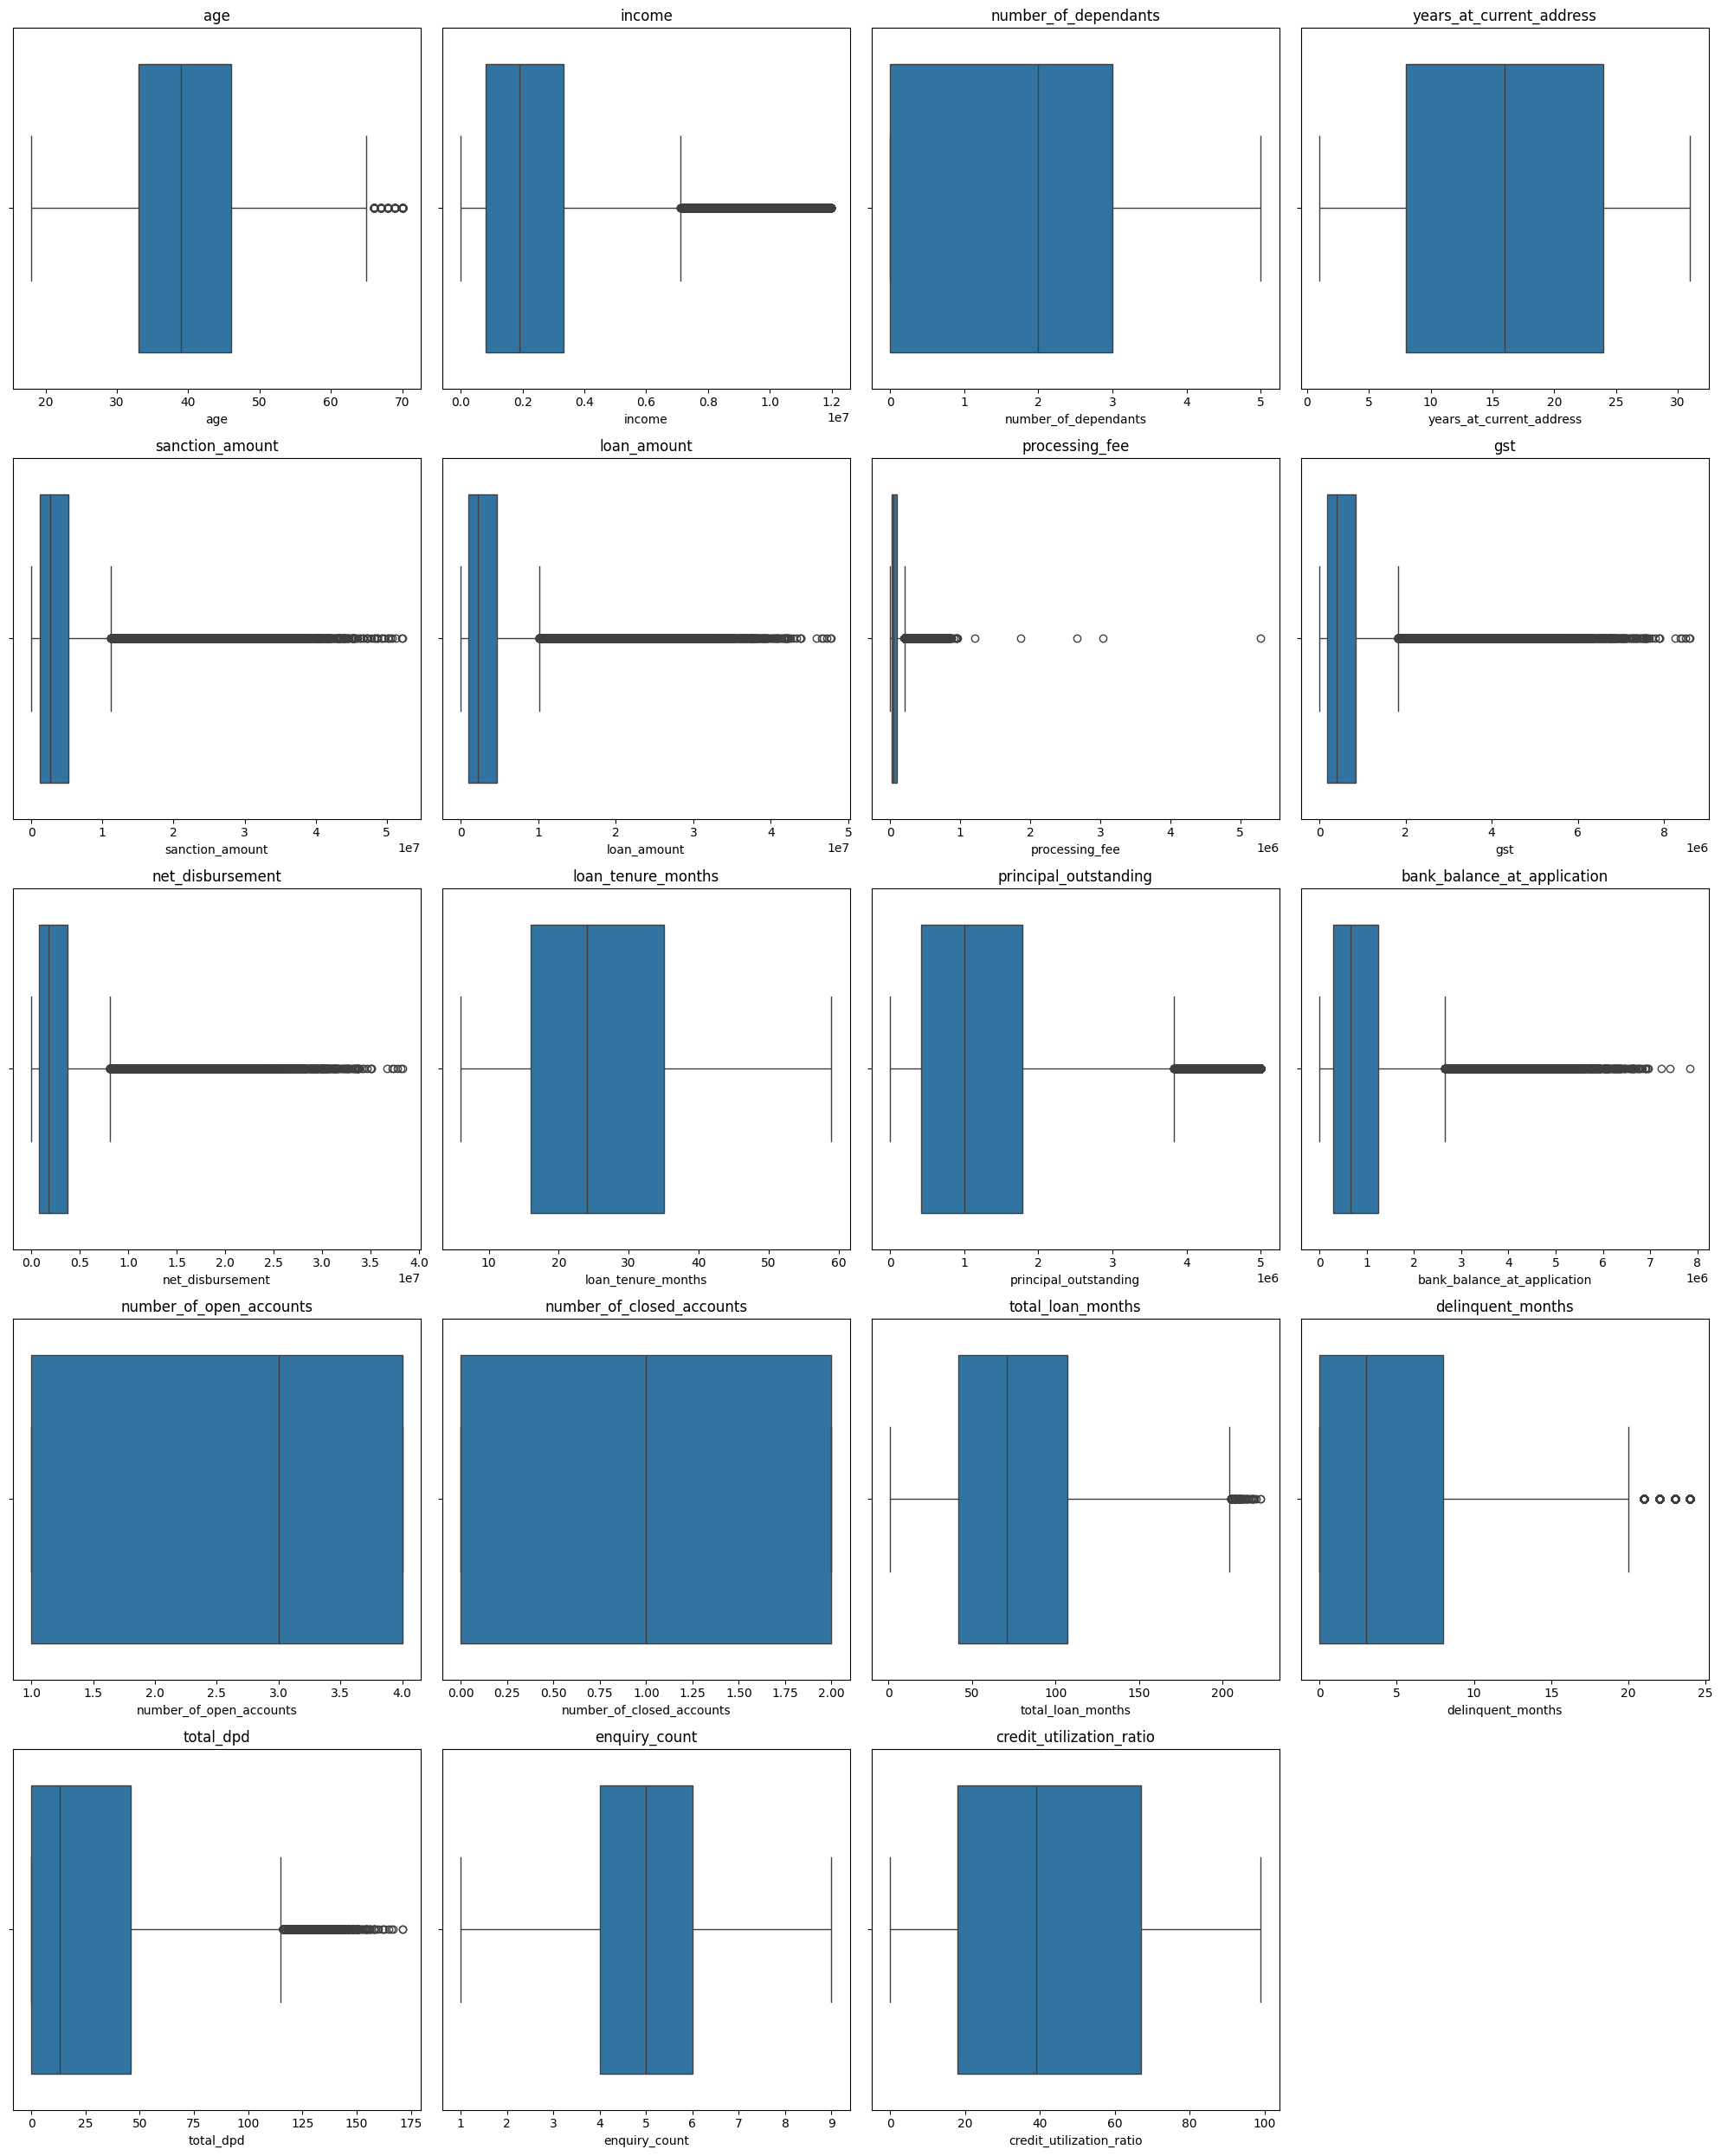

In [ ]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide them
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


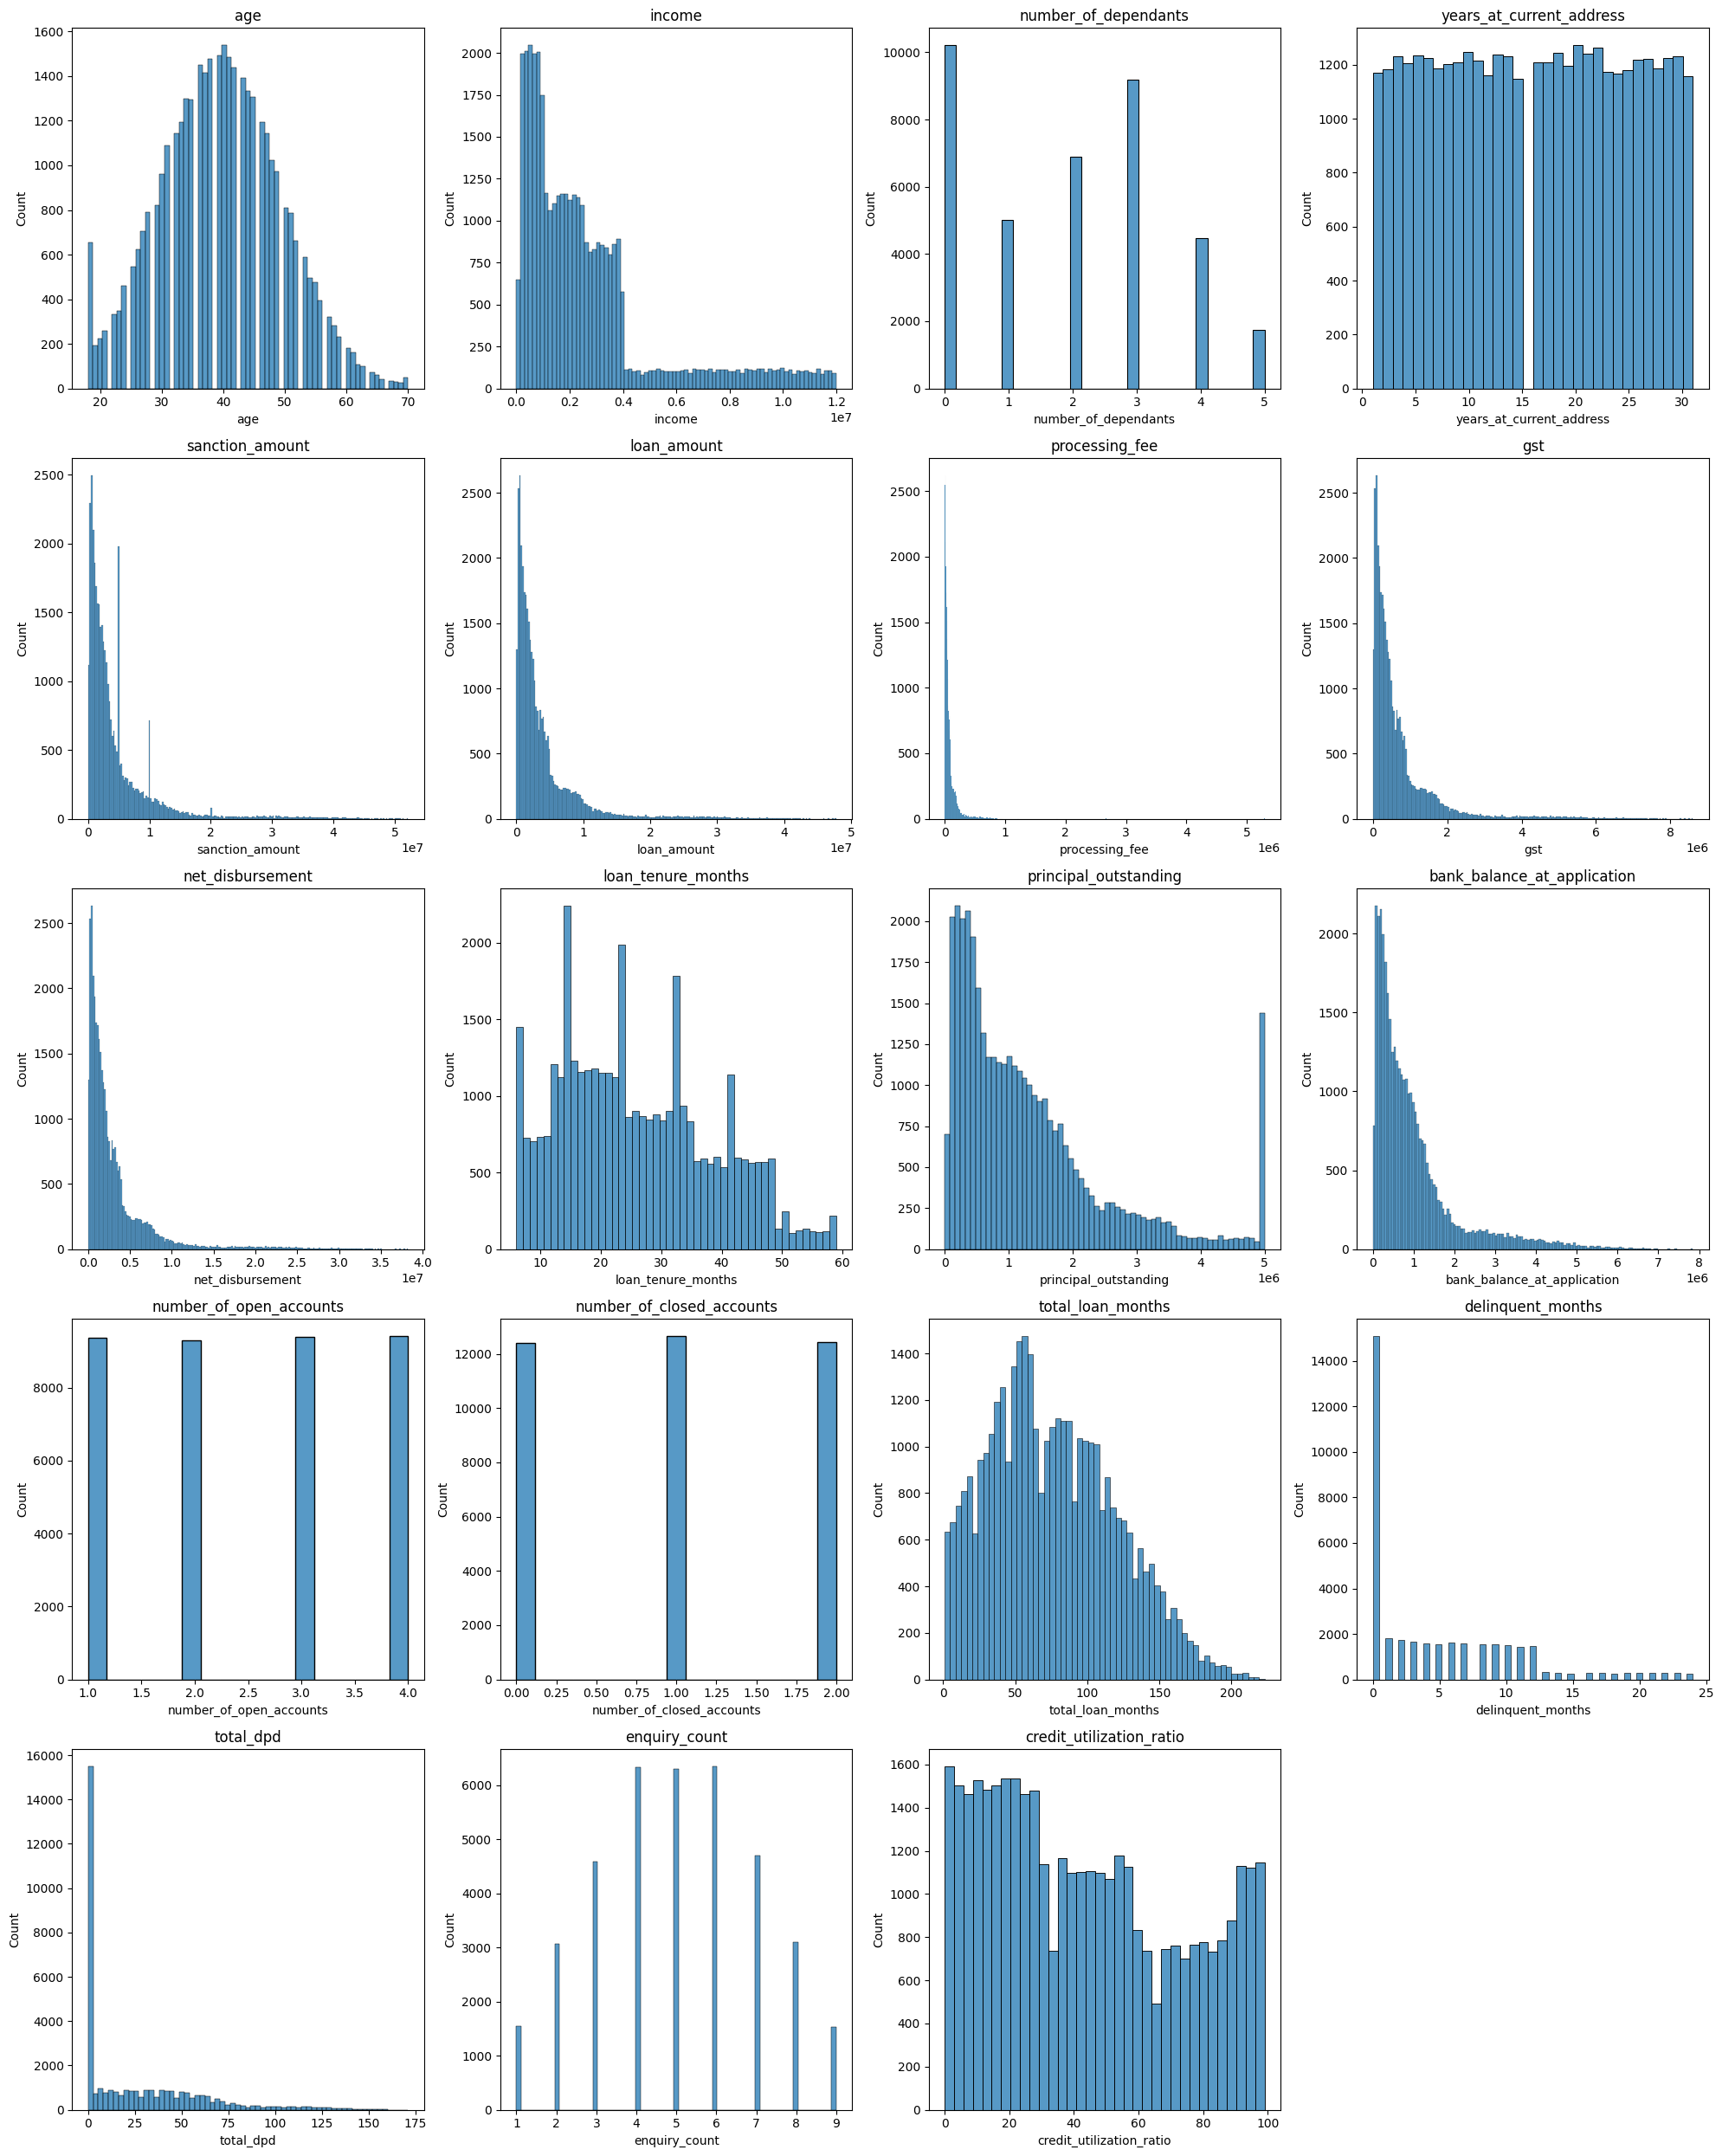

In [ ]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide them
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df_train.processing_fee.describe()

,processing_fee
count,37500.00
mean,80290.68
std,113128.14
min,0.00
25%,19220.00
50%,44600.00
75%,92420.00
max,5293543.52


In [ ]:
df_train[(df_train.processing_fee / df_train.loan_amount) > 0.03 ][["loan_amount", 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [ ]:
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount) < 0.03].copy()
df_train_1[(df_train_1.processing_fee / df_train_1.loan_amount) > 0.03 ][["loan_amount", 'processing_fee']]

,loan_amount,processing_fee


In [ ]:
df_test = df_test[(df_test.processing_fee/df_test.loan_amount) < 0.03].copy()
df_test.shape

(12497, 33)

In [ ]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [ ]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [ ]:
df_train_1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)
df_test['loan_purpose'].replace('Personaal', 'Personal', inplace=True)
df_train_1.loan_purpose.unique()

<ipython-input-29-3f00b57acd65>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)
<ipython-input-29-3f00b57acd65>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)



---



---


<h2> Exploratory Data Analysis (EDA) <h2>

---



---



In [ ]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Density'>

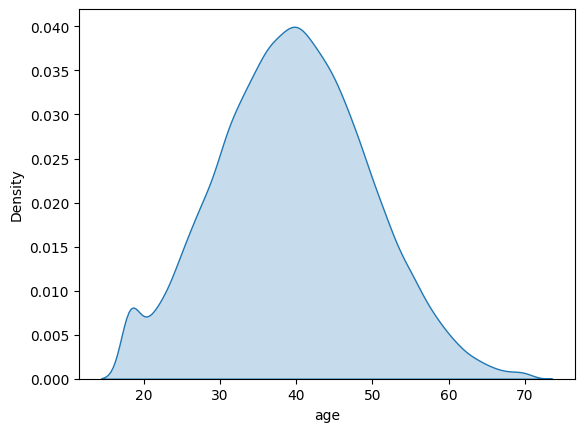

In [ ]:
sns.kdeplot(df_train.age, fill=True)

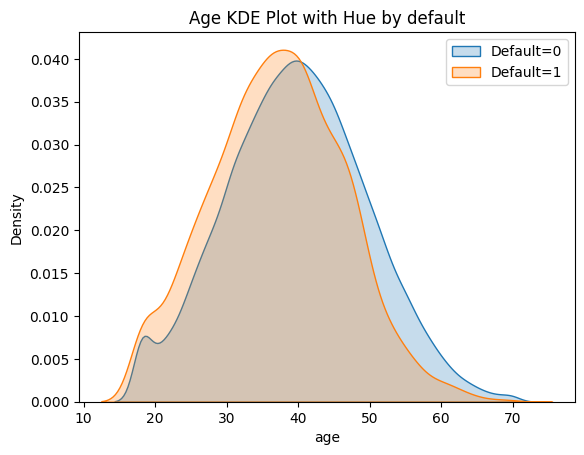

In [ ]:
sns.kdeplot(df_train[df_train.default==0]['age'], fill=True, label="Default=0")
sns.kdeplot(df_train[df_train.default==1]['age'], fill=True, label="Default=1")
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

INSIGHTS
1. Orange graph is tilted towards the left this means people with younger age are more likely to default.

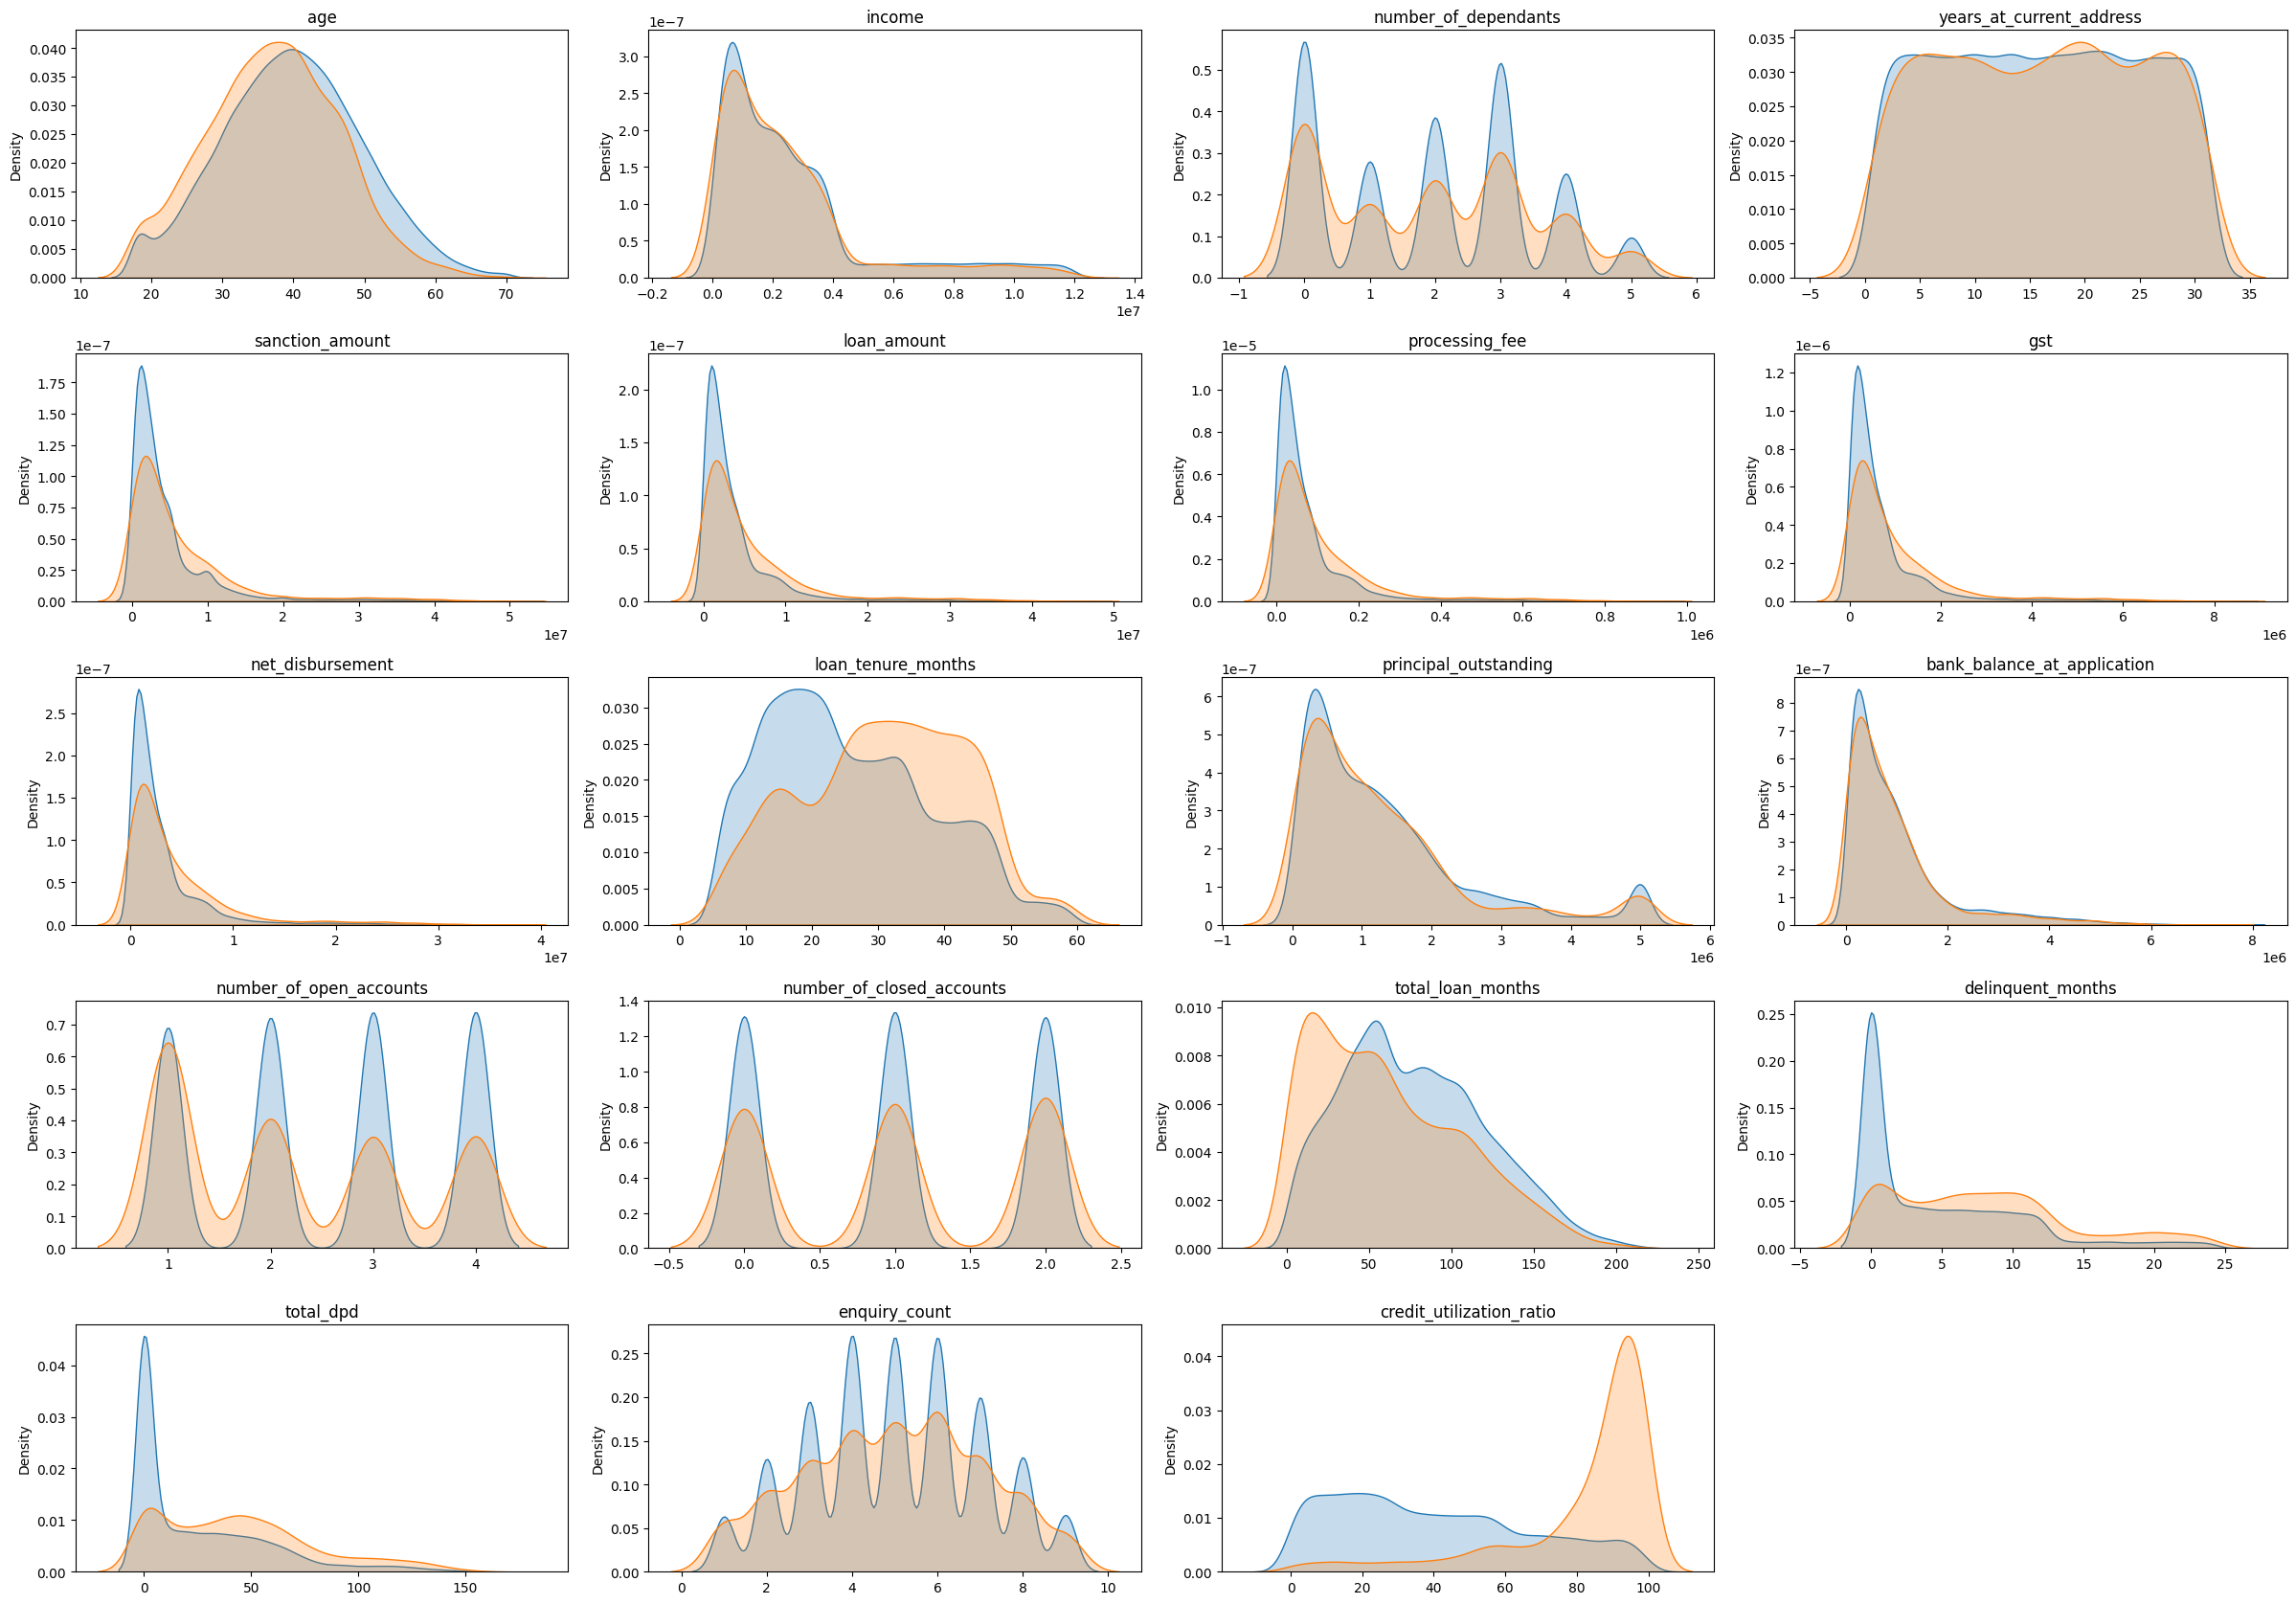

In [ ]:
plt.figure(figsize=(24, 20)) #Width, height in inches

for i, col in enumerate(columns_continuous):
  plt.subplot(6, 4, i+1)
  sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label="Default=0")
  sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label="Default=1")
  plt.title(col)
  plt.xlabel('')

plt.tight_layout()
plt.show()


INSIGHTS
1. In columns: loan_tenure_months, deliquent_months, total_dpd, credit_utilization, higher values indicate high likelihood of becoming a default.Hence these 4 look like strong predictors.
2. In remaning columns the distributions do not give any abvious insights.
3. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable.



---



---

<H2> Feature Engineering (FE) <H2>


---



---



In [ ]:
df_train_1["loan_to_income"] = round(df_train_1["loan_amount"]/df_train_1["income"], 2)
df_test["loan_to_income"] = round(df_test["loan_amount"]/df_test["income"], 2)

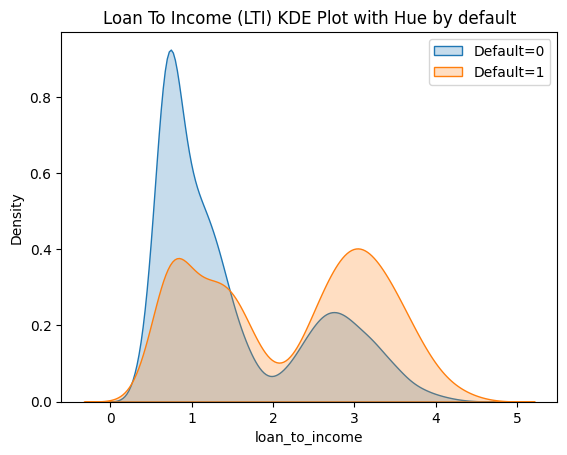

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'], fill=True, label="Default=1")
plt.title(f"Loan To Income (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [ ]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [ ]:
df_train_1[["delinquent_months", "total_loan_months"]]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [ ]:
df_train_1['delinquency_ratio'] = round(df_train_1['delinquent_months']*100 / df_train_1['total_loan_months'], 3)
df_test['delinquency_ratio'] = round(df_test['delinquent_months']*100 / df_test['total_loan_months'], 3)
df_train_1[["delinquent_months", "total_loan_months", "delinquency_ratio"]].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22


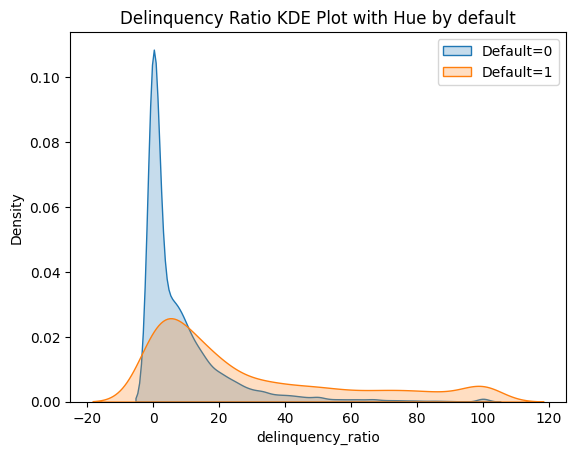

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquency_ratio'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquency_ratio'], fill=True, label="Default=1")
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [ ]:
df_train_1['avg_dpd_per_deliquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_deliquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

df_train_1['avg_dpd_per_deliquency'].describe()

,avg_dpd_per_deliquency
count,37488.00
mean,3.28
std,2.91
min,0.00
25%,0.00
50%,4.30
75%,5.72
max,10.00


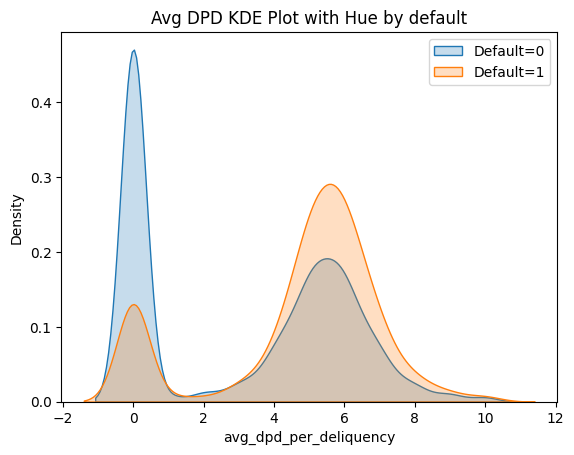

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_deliquency'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_deliquency'], fill=True, label="Default=1")
plt.title(f"Avg DPD KDE Plot with Hue by default")
plt.legend()
plt.show()

In [ ]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')



---



---


<h2> Feature Selection <h2>

---



---




In [ ]:
df_train_2 = df_train_1.drop(["cust_id", "loan_id"], axis='columns')
df_test = df_test.drop(["cust_id", "loan_id"], axis='columns')

In [ ]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                        'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

df_train_3.columns


Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [ ]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [ ]:
df_train_3.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [ ]:
df_train_3.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [ ]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

# Redefine cols_to_scale after dropping 'default'
cols_to_scale = X_train.select_dtypes(["int64", "float64"]).columns

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_deliquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df = pd.DataFrame()
  vif_df['Column'] = data.columns
  vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
  return vif_df

In [ ]:
calculate_vif(X_train[cols_to_scale])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [ ]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [ ]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [ ]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency'], dtype=object)

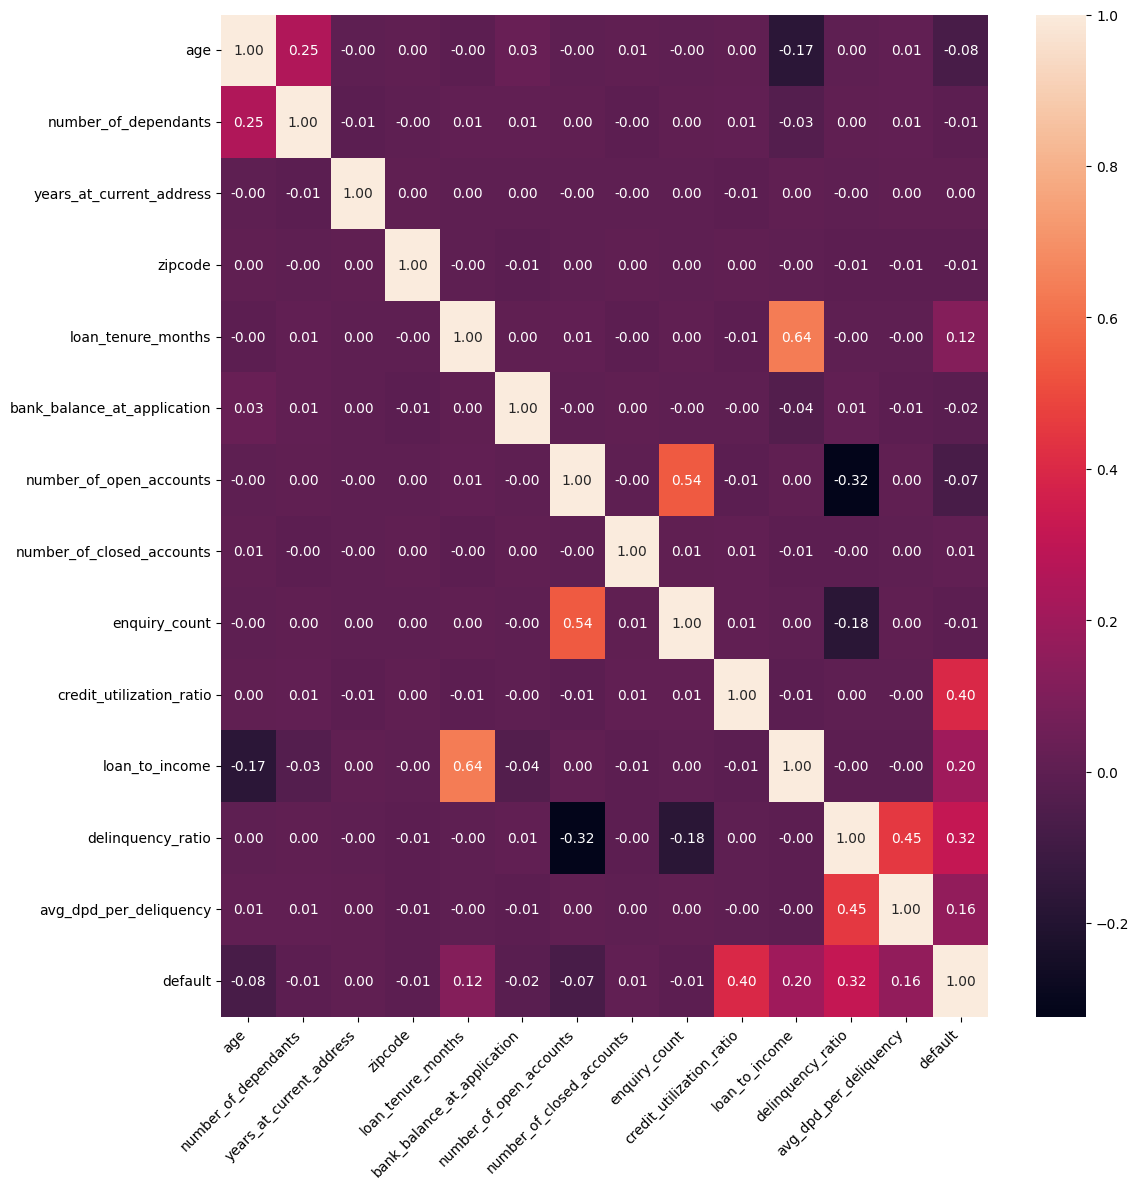

In [ ]:
plt.figure(figsize=(12, 12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [ ]:
temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [ ]:
def calculate_woe_iv(df, feature, target):
   grouped = df.groupby(feature)[target].agg(['count','sum'])
   grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
   grouped['bad'] = grouped['total'] - grouped['good']

   total_good = grouped['good'].sum()
   total_bad = grouped['bad'].sum()

   grouped['good_pct'] = grouped['good'] / total_good
   grouped['bad_pct'] = grouped['bad'] / total_bad
   grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
   grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct']) * grouped['woe']

   grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
   grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
   total_iv = grouped['woe'] = grouped['iv'].sum()

   return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,0.37,0.08
Education,5620,559,5061,0.17,0.15,0.37,0.00
Home,11304,1734,9570,0.54,0.28,0.37,0.17
Personal,13117,603,12514,0.19,0.37,0.37,0.12


In [ ]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [ ]:
pd.cut(X_train_1['loan_to_income'], bins=10)

,loan_to_income
12746,"(0.4, 0.5]"
32495,"(0.3, 0.4]"
43675,"(0.7, 0.8]"
9040,"(0.1, 0.2]"
13077,"(-0.001, 0.1]"
...,...
28515,"(-0.001, 0.1]"
5558,"(0.1, 0.2]"
45236,"(0.7, 0.8]"
49228,"(0.2, 0.3]"


In [ ]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), feature, 'default')
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
    iv_values[feature] = iv

iv_values


{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_deliquency': 0.40151905412190175}

In [ ]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df


,Feature,IV
17,credit_utilization_ratio,2.35
19,delinquency_ratio,0.72
18,loan_to_income,0.48
20,avg_dpd_per_deliquency,0.40
10,loan_purpose,0.37
5,residence_type,0.25
12,loan_tenure_months,0.22
11,loan_type,0.16
0,age,0.09
14,number_of_open_accounts,0.08


In [ ]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_deliquency']

<h3> Feature Encoding

In [ ]:
# Apply feature engineering steps to X_test to create the missing features
X_test["loan_to_income"] = round(X_test["loan_amount"]/X_test["income"], 2)
X_test['delinquency_ratio'] = round(X_test['delinquent_months']*100 / X_test['total_loan_months'], 3)
X_test['avg_dpd_per_deliquency'] = np.where(
    X_test['delinquent_months'] != 0,
    (X_test['total_dpd'] / X_test['delinquent_months']).round(1),
    0
)

# Now you can select the features from X_test
X_test_reduced = X_test[selected_features_iv]

In [ ]:
X_train_reduced = X_train_1[selected_features_iv] # Changed X_train_l to X_train_1
X_test_reduced = X_test[selected_features_iv]

In [ ]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_deliquency
12746,0.79,Owned,Home,Secured,0.42,1.00,0.36,0.41,0.13,0.59
32495,0.50,Owned,Education,Secured,0.83,0.67,0.05,0.31,0.06,0.62
43675,0.38,Mortgage,Home,Secured,0.49,0.00,0.00,0.76,0.22,0.56
9040,0.46,Mortgage,Education,Secured,0.64,0.67,0.88,0.19,0.00,0.00
13077,0.77,Owned,Personal,Unsecured,0.17,0.00,0.72,0.05,0.00,0.00


In [ ]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.79,0.42,1.00,0.36,0.41,0.13,0.59,True,False,False,True,False,False
32495,0.50,0.83,0.67,0.05,0.31,0.06,0.62,True,False,True,False,False,False
43675,0.38,0.49,0.00,0.00,0.76,0.22,0.56,False,False,False,True,False,False
9040,0.46,0.64,0.67,0.88,0.19,0.00,0.00,False,False,True,False,False,False
13077,0.77,0.17,0.00,0.72,0.05,0.00,0.00,True,False,False,False,True,True


We will retain categorical columns with an Information Value (IV) greater than 0.02, as they significantly influence the target variable. Columns with a lower IV will be excluded. Apply one-hot encoding to the selected categorical features to prepare them for model training

<h3> Model Trianing

---------------------------------------------------






Attempt 1:
1. Logistic Regression, RandomForest & XGB
2. No. handling of class imbalance

In [ ]:
y_train.value_counts()

,count
default,
0,34265
1,3223


In [ ]:
# Get the list of columns in the training data
train_columns = X_train_encoded.columns

# Reindex the test data to match the training data columns
# This will add missing columns and fill them with 0
X_test_encoded = X_test_encoded.reindex(columns=train_columns, fill_value=0)

# Now you can proceed with prediction
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)


model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02     11426
           1       0.09      1.00      0.16      1074

    accuracy                           0.09     12500
   macro avg       0.54      0.50      0.09     12500
weighted avg       0.92      0.09      0.03     12500



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.05      0.09     11426
           1       0.09      1.00      0.17      1074

    accuracy                           0.13     12500
   macro avg       0.54      0.52      0.13     12500
weighted avg       0.92      0.13      0.10     12500



In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.01      0.01     11426
           1       0.09      1.00      0.16      1074

    accuracy                           0.09     12500
   macro avg       0.54      0.50      0.09     12500
weighted avg       0.92      0.09      0.02     12500



// All of the Linear Regression, Random Forest and XGB are giving similar performance

//So we are going to consider Linear Regression as it has better explanability

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the parameter distribution
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']  # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Retrieve the best model from RandomizedSearchCV
best_model = random_search.best_estimator_
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': 545.5594781168514}
Best Score: 0.7579612918377666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     11426
           1       0.09      1.00      0.16      1074

    accuracy                           0.09     12500
   macro avg       0.54      0.50      0.09     12500
weighted avg       0.92      0.09      0.02     12500



<h3> Attempt 2

1. Logistic Regression & XGB
2. Handle class imbalance using under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler with a random state for reproducibility
rus = RandomUnderSampler(random_state=42)

# Perform undersampling on the training data (X_train_encoded and y_train)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)

# Display the value counts of the resampled target variable
print(y_train_rus.value_counts())


default
0    3223
1    3223
Name: count, dtype: int64


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.2 MB/s eta 0:00:00


<h3> Hyperparameter Tuning Using Optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    C = trial.suggest_float("C", 1, 5)
    solver = trial.suggest_categorical("solver", ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

    # Create a Logistic Regression model with the suggested hyperparameters
    model = LogisticRegression(C=C, solver=solver, max_iter=1000)

    # Perform cross-validation and calculate accuracy
    # Use the encoded training data (X_train_rus, y_train_rus) for cross-validation
    scores = cross_val_score(model, X_train_rus, y_train_rus, cv=3, scoring="accuracy")
    accuracy = np.mean(scores)

    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the best parameters and best cross-validation accuracy
print("Best parameters: ", study.best_params)
print("Best cross-validation accuracy: ", study.best_value)

[I 2025-03-14 09:10:10,357] A new study created in memory with name: no-name-32c43afe-c395-4096-9f6e-5bf3ce626833
[I 2025-03-14 09:10:10,492] Trial 0 finished with value: 0.9343780500450746 and parameters: {'C': 2.644298185508385, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.9343780500450746.
[I 2025-03-14 09:10:10,670] Trial 1 finished with value: 0.9334473124075148 and parameters: {'C': 4.166205305388239, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9343780500450746.
[I 2025-03-14 09:10:10,822] Trial 2 finished with value: 0.9326718300978123 and parameters: {'C': 1.0427524215765804, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.9343780500450746.
[I 2025-03-14 09:10:10,974] Trial 3 finished with value: 0.9346885607007893 and parameters: {'C': 3.472971387006878, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.9346885607007893.
[I 2025-03-14 09:10:11,135] Trial 4 finished with value: 0.9329819796946252 and parameters: {'C': 2.6755310974027844, 'solver': 'liblinea

Best parameters:  {'C': 3.472971387006878, 'solver': 'lbfgs'}
Best cross-validation accuracy:  0.9346885607007893
